In [102]:
import pandas as pd

data = pd.read_csv('train.txt', sep="\t", header=None)
data.columns = ["word", "type"]
data

,word,type
0,@SammieLynnsMom,O
1,@tg10781,O
2,they,O
3,will,O
4,be,O
...,...,...
37614,whatchu,O
37615,got,O
37616,for,O
37617,me,O


In [111]:
data["type"].value_counts()

O                35679
B-person           361
I-other            230
B-geo-loc          229
B-other            177
I-person           168
B-company          144
B-facility          87
I-facility          81
B-product           74
I-product           61
B-musicartist       45
I-musicartist       44
I-geo-loc           43
B-sportsteam        40
I-company           31
I-movie             29
B-tvshow            28
I-tvshow            26
B-movie             23
I-sportsteam        19
Name: type, dtype: int64

<AxesSubplot:>

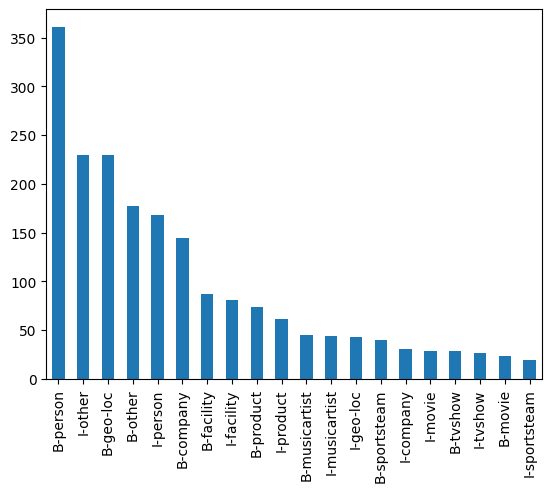

In [110]:
data[data.type != "O"]["type"].value_counts().plot(kind="bar")

In [91]:
U = data.type.unique()
for i in range(21):
    print("\"" + U[i] + "\"" + ": " + str(i) + ", ", end= "")
print("START_TAG: 21, STOP_TAG: 22")

"O": 0, "B-geo-loc": 1, "B-facility": 2, "I-facility": 3, "B-movie": 4, "I-movie": 5, "B-company": 6, "B-product": 7, "B-person": 8, "B-sportsteam": 9, "I-sportsteam": 10, "I-product": 11, "B-other": 12, "I-other": 13, "I-company": 14, "I-person": 15, "I-geo-loc": 16, "B-tvshow": 17, "B-musicartist": 18, "I-musicartist": 19, "I-tvshow": 20, START_TAG: 21, STOP_TAG: 22


In [92]:
data = ['@SammieLynnsMom\tO\n@tg10781\tO\nthey\tO\nwill\tO\nbe\tO\nall\tO\ndone\tO\nby\tO\nSunday\tO\ntrust\tO\nme\tO\n*wink*\tO',
 'Made\tO\nit\tO\nback\tO\nhome\tO\nto\tO\nGA\tB-geo-loc\n.\tO\nIt\tO\nsucks\tO\nnot\tO\nto\tO\nbe\tO\nat\tO\nDisney\
     tB-facility\nworld\tI-facility\n,\tO\nbut\tO\nits\tO\ngood\tO\nto\tO\nbe\tO\nhome\tO\n.\tO\nTime\tO\nto\tO\nstart\tO\nplanning\tO\nthe\tO\nnext\tO\nDisney\tB-facility\nWorld\tI-facility\ntrip\tO\n.\tO']

result = []
for entry in data:
    lines = entry.strip().split('\n')
    words, tags = zip(*[line.split('\t') for line in lines])
    result.append((list(words), list(tags)))

print(result)



ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
with open('train.txt') as f:
    contents = f.read()
    data = contents.split('\n\n')
     
result = []

for block in data:
    lines = block.strip().split('\n')
    if len(lines[0]) == 0: 
        break
    words, tags = zip(*[line.split('\t') for line in lines])
    result.append((list(words), list(tags)))

result

# data


[(['@SammieLynnsMom',
   '@tg10781',
   'they',
   'will',
   'be',
   'all',
   'done',
   'by',
   'Sunday',
   'trust',
   'me',
   '*wink*'],
  ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']),
 (['Made',
   'it',
   'back',
   'home',
   'to',
   'GA',
   '.',
   'It',
   'sucks',
   'not',
   'to',
   'be',
   'at',
   'Disney',
   'world',
   ',',
   'but',
   'its',
   'good',
   'to',
   'be',
   'home',
   '.',
   'Time',
   'to',
   'start',
   'planning',
   'the',
   'next',
   'Disney',
   'World',
   'trip',
   '.'],
  ['O',
   'O',
   'O',
   'O',
   'O',
   'B-geo-loc',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-facility',
   'I-facility',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'O',
   'B-facility',
   'I-facility',
   'O',
   'O']),
 (["'",
   'Breaking',
   'Dawn',
   "'",
   'Returns',
   'to',
   'Vancouver',
   'on',
   'January',
   '11th',
   'http://bit.ly/dbDMs8

In [ ]:
import pandas as pd  


 
data = pd.read_csv('train.txt', sep="\t", header=None)
data.columns = ["word", "type"]
df = pd.DataFrame(data) 

training_data=[]

escapes = ''.join([chr(char) for char in range(1, 32)])
translator = str.maketrans('', '', escapes)

for col in df.columns:
    l = df[col].to_list()
    # l = l.translate(translator)
    training_data.append(l)
 
for i in range(len(training_data[0])):
    training_data[0][i] = training_data[0][i].translate(translator)
print(training_data)

[['@SammieLynnsMom', '@tg10781', 'they', 'will', 'be', 'all', 'done', 'by', 'Sunday', 'trust', 'me', '*wink*', 'Made', 'it', 'back', 'home', 'to', 'GA', '.', 'It', 'sucks', 'not', 'to', 'be', 'at', 'Disney', 'world', ',', 'but', 'its', 'good', 'to', 'be', 'home', '.', 'Time', 'to', 'start', 'planning', 'the', 'next', 'Disney', 'World', 'trip', '.', "'", 'Breaking', 'Dawn', "'", 'Returns', 'to', 'Vancouver', 'on', 'January', '11th', 'http://bit.ly/dbDMs8', '@ls_n', 'perhaps', ',', 'but', 'folks', 'may', 'find', 'something', 'in', 'the', 'gallery', 'that', 'is', 'helpful', 'in', 'their', 'day-to-day', 'work', 'as', 'well', '.', 'Even', 'just', 'to', 'use', 'it', '.', '@Carr0t', 'aye', 'been', 'tonight', '-', 'excellent', 'RT', '@LilTwist', ':', 'RT', 'this', 'if', 'you', 'want', 'me', 'to', 'go', 'back', 'live', 'on', 'Ustream', 'later', 'tonight', '@Hollly_', '16', 'b', '17', 'in', 'feb', 'RT', '@obsidianchao', ':', 'OF', 'FUCKING', 'COURSE', '.', 'I', 'GET', 'HOME', 'AND', 'MY', 'BROTH

In [ ]:
from torch.utils.data import Dataset, DataLoader, TensorDataset

def addbatch(data_train,data_test,batchsize):
    """
    设置batch
    :param data_train: 输入
    :param data_test: 标签
    :param batchsize: 一个batch大小
    :return: 设置好batch的数据集
    """
    data = TensorDataset(data_train,data_test)
    data_loader = DataLoader(data, batch_size=batchsize, shuffle=False)#shuffle是是否打乱数据集，可自行设置

    return data_loader

c:\Users\user\anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:


traindata=addbatch(traininput,trainlabel,1000)#1000为一个batch_size大小为1000，训练集为10000时一个epoch会训练10次。

In [ ]:
#设置batch



In [ ]:
for epoch in range(EPOCH):
    for step, data in enumerate(traindata):
        inputs, labels = data
        # 前向传播
        out = net(inputs)
        # 计算损失函数
        loss = loss_func(out, labels)
        # 清空上一轮的梯度
        optimizer.zero_grad()
        # 反向传播
        loss.backward()
        # 参数更新
        optimizer.step()

In [ ]:
data = '''@SammieLynnsMom    O
@tg10781    O

they    O
will    O
be    O'''

lines = data.split('\n')
training_data = []
sentence = ([], [])

for line in lines:
    parts = line.split()
    if len(parts) == 2:
        word, tag = parts
        sentence[0].append(word)
        sentence[1].append(tag)
    elif len(sentence[0]) > 0:
        training_data.append((sentence[0], sentence[1]))
        sentence = ([], [])

training_data = [([word for word in sent[0]], [tag for tag in sent[1]]) for sent in training_data]

print(training_data)


[(['@SammieLynnsMom', '@tg10781'], ['O', 'O'])]
